In [1]:
"""
    This notebook is used to generate the figures for the following section:
    "Architecture and Training of the Model"
"""

'\n    This notebook is used to generate the figures for the following section:\n    "Architecture and Training of the Model"\n'

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd

In [3]:

# Load the dataset
dataset_path = "tmp/training_set_stg.csv"

from inference import SpikeFeatureExtractor

sfe = SpikeFeatureExtractor()

dataset = pd.read_csv(dataset_path)
dataset = dataset.sample(n=1000, random_state=42)

results = sfe.extract_from_dataframe(dataset)
print(results.head())

                                            spiking_times  label  f_spiking  \
448492  [0.0, 68.6001, 137.30005, 206.1001, 274.75, 34...      1  14.547284   
493437  [0.0, 16.75, 124.80005, 141.9502, 249.25, 266....      2   0.000000   
240320  [0.0, 6.199951, 11.449951, 15.949951, 20.09985...      2   0.000000   
443940  [0.0, 9.550049, 18.050049, 26.550049, 36.25, 1...      2   0.000000   
611403  [0.0, 5.75, 10.75, 15.149902, 19.399902, 23.80...      2   0.000000   

        f_intra_bursting  f_inter_bursting  duration_bursting  \
448492          0.000000          0.000000           0.000000   
493437        117.872726          8.026425          16.967844   
240320        232.045731          5.931784          43.094971   
443940        137.879318          6.821282          36.263607   
611403        242.117798          7.374632          28.911564   

        nbr_spikes_bursting  
448492                  0.0  
493437                  2.0  
240320                 10.0  
443940        

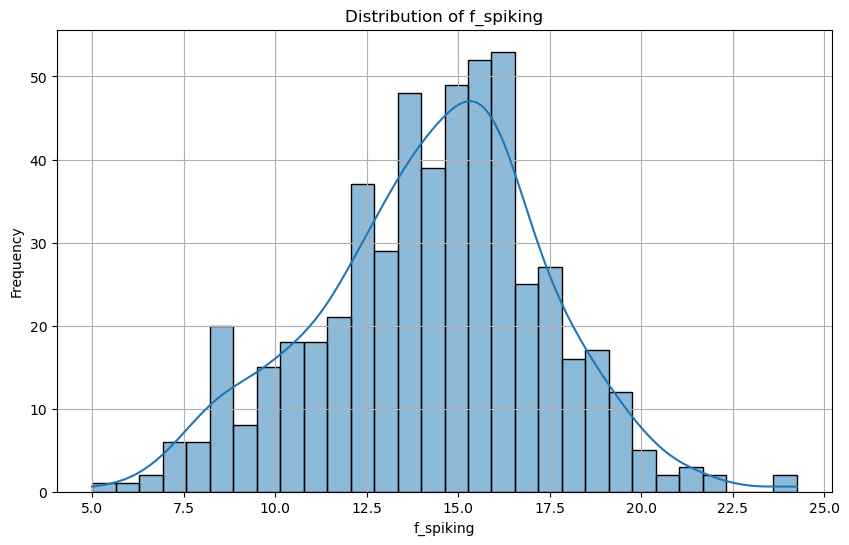

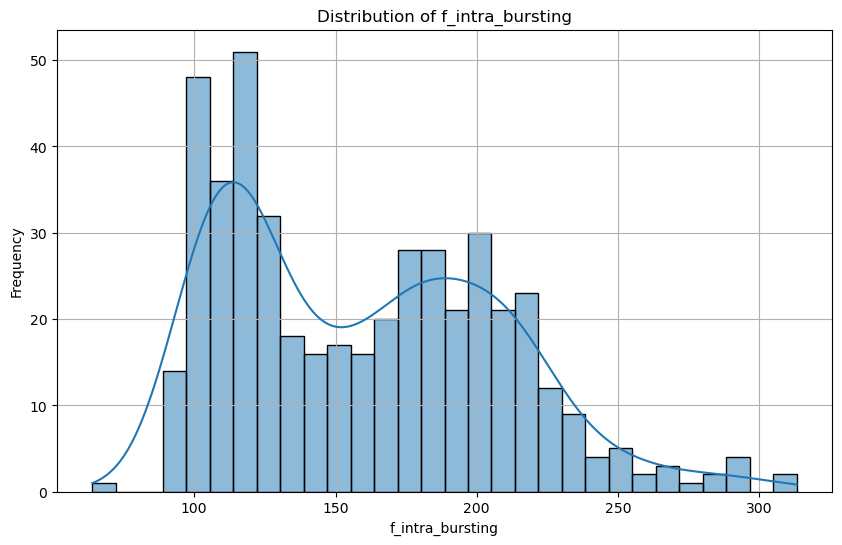

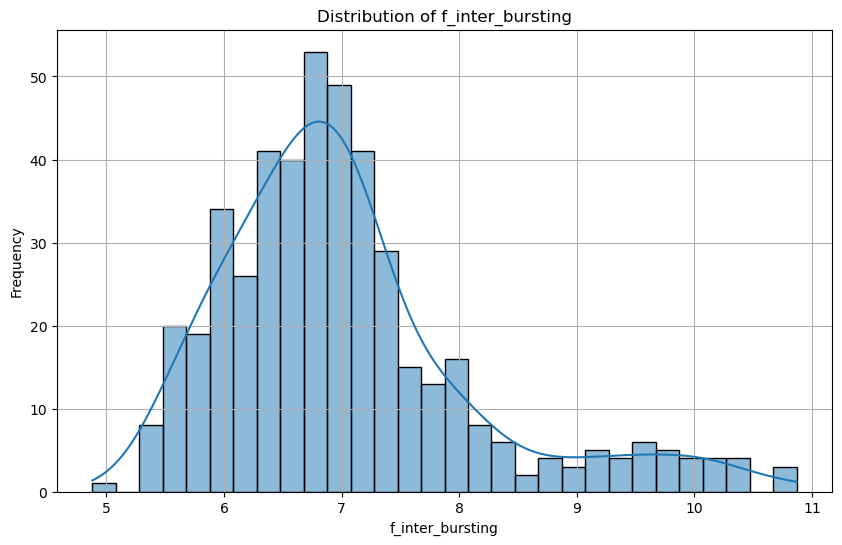

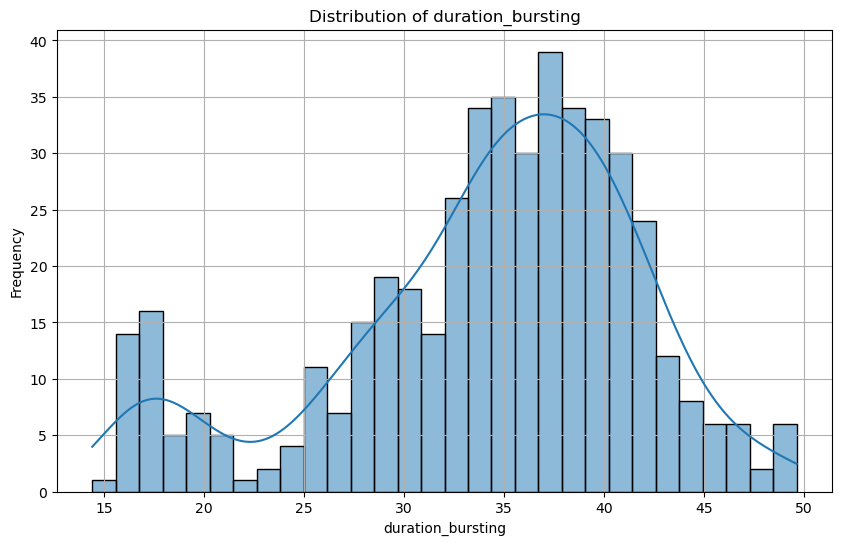

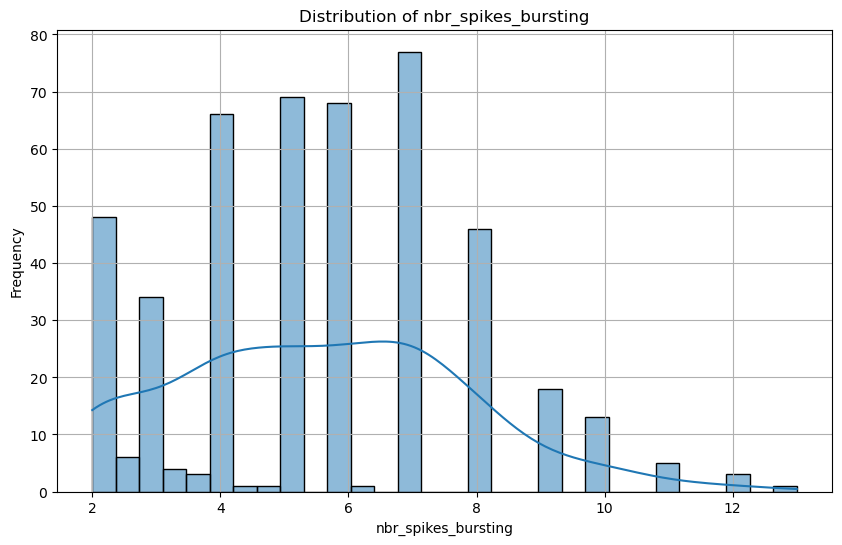

In [4]:
# plot distribution of features
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_distribution(data, feature):
    plt.figure(figsize=(10, 6))
    sns.histplot(data[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()

spiking_data = results[results['label'] == 1]
bursting_data = results[results['label'] == 2]
spiking_features = ['f_spiking']
bursting_features = ['f_intra_bursting', 'f_inter_bursting', 'duration_bursting', 'nbr_spikes_bursting']

for feature in spiking_features:
    plot_feature_distribution(spiking_data, feature)
for feature in bursting_features:
    plot_feature_distribution(bursting_data, feature)

(21,) 1080.9223068599772 835.5783817872726 1916.5006886472497


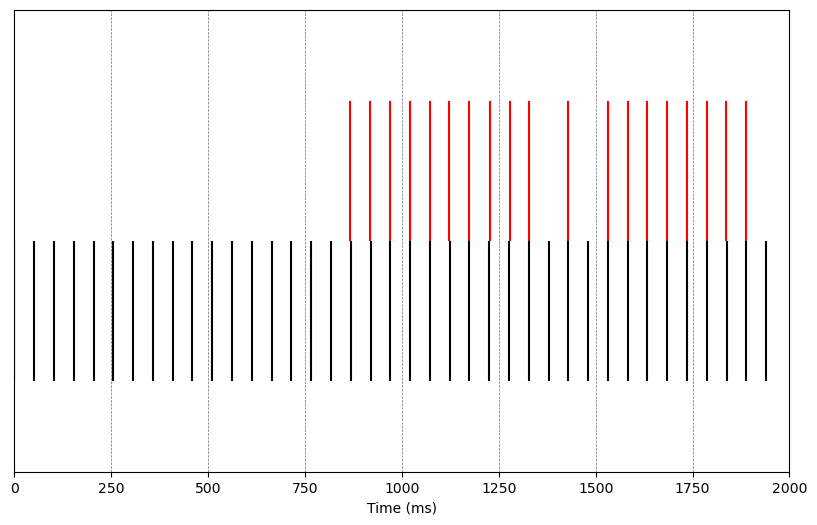

In [47]:
import numpy as np
def get_a_sample(dataset):
    # return the spiking_times
    s = dataset.sample()
    return np.asarray(s['spiking_times'].values[0])

def add_noise(spiking_times, noise_level=2, dropout_rate=0.05, T = 2000):
    duration = np.random.uniform(T//2, T)
    # extract a time window of the spiking times
    start_time = np.random.uniform(0, T - duration)
    end_time = start_time + duration
    spiking_times = spiking_times[(spiking_times >= start_time) & (spiking_times <= end_time)]
    print(spiking_times.shape, duration, start_time, end_time)
    # Add Gaussian noise to the spiking times

    noise = np.random.normal(0, noise_level, size=spiking_times.shape)

    noisy_spiking_times = spiking_times + noise
    # Apply dropout
    dropout_mask = np.random.rand(len(noisy_spiking_times)) > dropout_rate
    noisy_spiking_times = noisy_spiking_times[dropout_mask]

    return noisy_spiking_times

def plot_a_sample(sample, t_min= 0, t_max = 2000):
    plt.figure(figsize=(10, 6))
    plt.xlim(t_min, t_max)
    plt.eventplot(sample, colors='black')
    noisy_sample = add_noise(sample)
    plt.eventplot(noisy_sample, colors='red', lineoffsets=2)
    plt.xlabel('Time (ms)')
    # no yticks
    plt.yticks([])
    plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=1, color='#636e72')
    #save as svg
    plt.savefig('figures/data_augmentation.svg', format='svg')
    plt.show()

sample = get_a_sample(results)

plot_a_sample(sample)